In [1]:
import pandas as pd

In [2]:
customers=pd.read_csv("C:\\Users\\dhara\\Downloads\\Customers.csv")
transactions=pd.read_csv("C:\\Users\\dhara\\Downloads\\Transactions.csv")

In [3]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [4]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [6]:
# Aggregate transaction data for each customer
customer_transactions = transactions.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'TotalValue': 'sum',
    'Price': 'mean'
}).reset_index()

# Merge with customer data
customer_data = pd.merge(customers, customer_transactions, on='CustomerID')

# Convert SignupDate to datetime format for further analysis
customer_data['SignupDate'] = pd.to_datetime(customer_data['SignupDate'])

# Extract year and month as separate features
customer_data['SignupYear'] = customer_data['SignupDate'].dt.year
customer_data['SignupMonth'] = customer_data['SignupDate'].dt.month

# Drop unnecessary columns
customer_data = customer_data.drop(columns=['CustomerName', 'SignupDate'])
customer_data

,CustomerID,Region,Quantity,TotalValue,Price,SignupYear,SignupMonth
0,C0001,South America,12,3354.52,278.334000,2022,7
1,C0002,Asia,10,1862.74,208.920000,2022,2
2,C0003,South America,14,2725.38,195.707500,2024,3
3,C0004,South America,23,5354.88,240.636250,2022,10
4,C0005,Asia,7,2034.24,291.603333,2022,8
...,...,...,...,...,...,...,...
194,C0196,Europe,12,4982.88,416.992500,2022,6
195,C0197,Europe,9,1928.65,227.056667,2023,3
196,C0198,Europe,3,931.83,239.705000,2022,2
197,C0199,Europe,9,1979.28,250.610000,2022,12


In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score

# Select features for clustering
features = ['Region', 'SignupYear', 'SignupMonth', 'Quantity', 'TotalValue', 'Price']
customer_data_encoded = pd.get_dummies(customer_data[features])

# Scale features
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data_encoded)

# Perform clustering
n_clusters = 5  # You can choose a different number between 2 and 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled)

# Calculate DB Index
db_index = davies_bouldin_score(customer_data_scaled, customer_data['Cluster'])
print("DB Index:", db_index)


DB Index: 1.379662328313341


C:\Users\dhara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


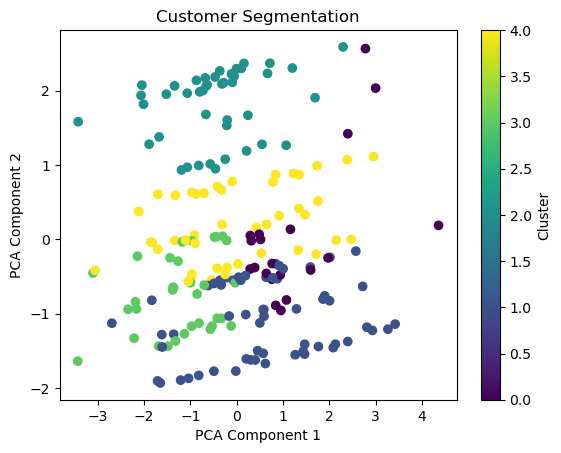

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
customer_data_2d = pca.fit_transform(customer_data_scaled)

plt.scatter(customer_data_2d[:, 0], customer_data_2d[:, 1], c=customer_data['Cluster'], cmap='viridis')
plt.title('Customer Segmentation')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()
